In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## VSYNC off
vsync disabled in nvidia settings as well as by code in SDL2 Software

In [10]:
PATH = "../data/231123_measurements_no_vsync_fr"

In [11]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['SDL2_Software_default_False_bitblt_3ef16c1e-af2f-4d25-aa87-50288d5428a8.csv',
 'SDL2_Software_default_False_bitblt_90a10df2-d2c4-448d-b91c-34392a6a0533.csv',
 'SDL2_Software_default_False_getdbits_25d58790-8c5c-4054-8bdc-47e9dce94130.csv',
 'SDL2_Software_default_False_getdbits_4980c04b-ba26-4277-ae94-6c57c59f639a.csv',
 'SDL2_Software_default_False_getpixel_3213b0a6-901f-41a3-b7a8-b95bbcc576cb.csv',
 'SDL2_Software_default_False_getpixel_5adcd52d-1bde-4546-a01f-414b0fd6cb6b.csv',
 'SDL2_Software_default_False_windup_python_0c3c7b97-5e2a-4a6d-8e58-ea5101bc9f58.csv',
 'SDL2_Software_default_False_windup_python_2da3de5e-e7da-4c57-ac52-bb15d95c5bec.csv',
 'SDL2_Software_default_True_bitblt_dd88332c-3efe-40dd-9650-a8af1e2b8908.csv',
 'SDL2_Software_default_True_bitblt_ddae2f29-cb83-49b1-b22c-b2e17be6fa9f.csv',
 'SDL2_Software_default_True_getdbits_842d1462-0885-4213-a86f-b40cd4932f0b.csv',
 'SDL2_Software_default_True_getdbits_92707b89-e211-48ae-a3fb-d2ae69b1d49b.csv',
 'SDL2_Software_de

In [12]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data = pd.concat(dataframes)

## End-to-end latencies with and without running framework tester
### Complexity: Default

Almost the same -> no additional latency with framework tester

C:\Users\tina\AppData\Local\Temp\ipykernel_19276\4173412873.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


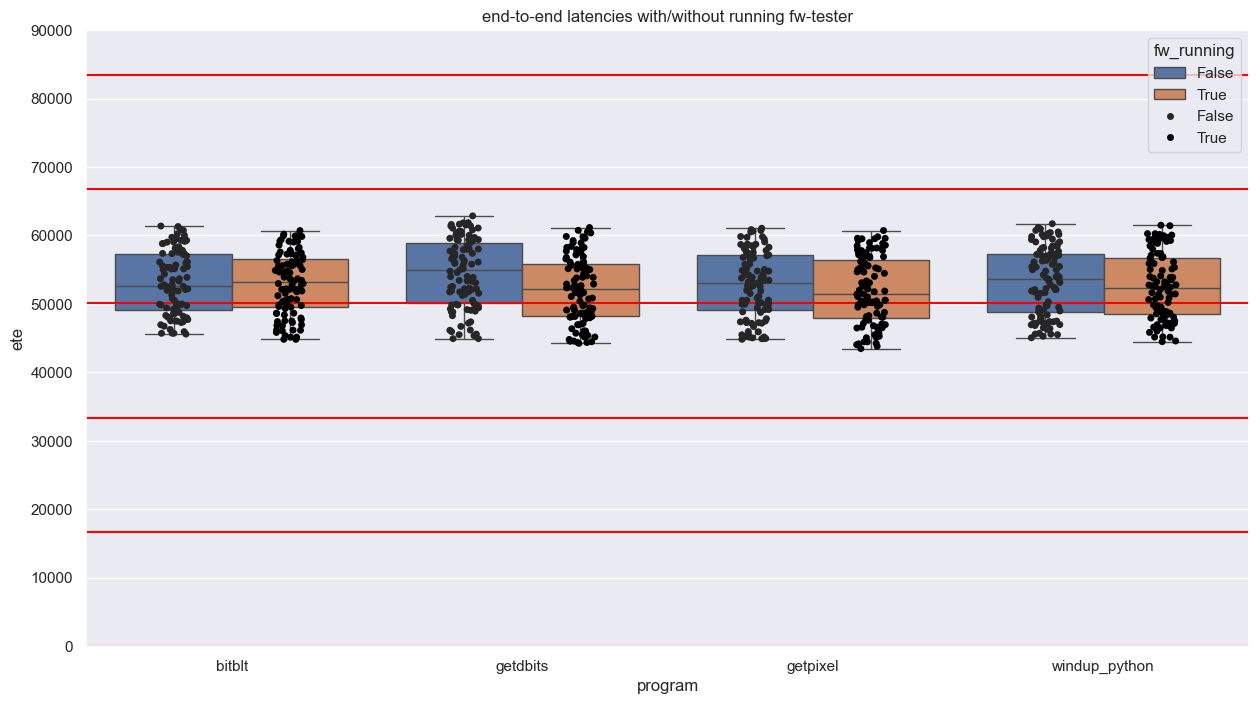

In [13]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 90000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

## Framework latency

C:\Users\tina\AppData\Local\Temp\ipykernel_19276\535576945.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 30000.0)

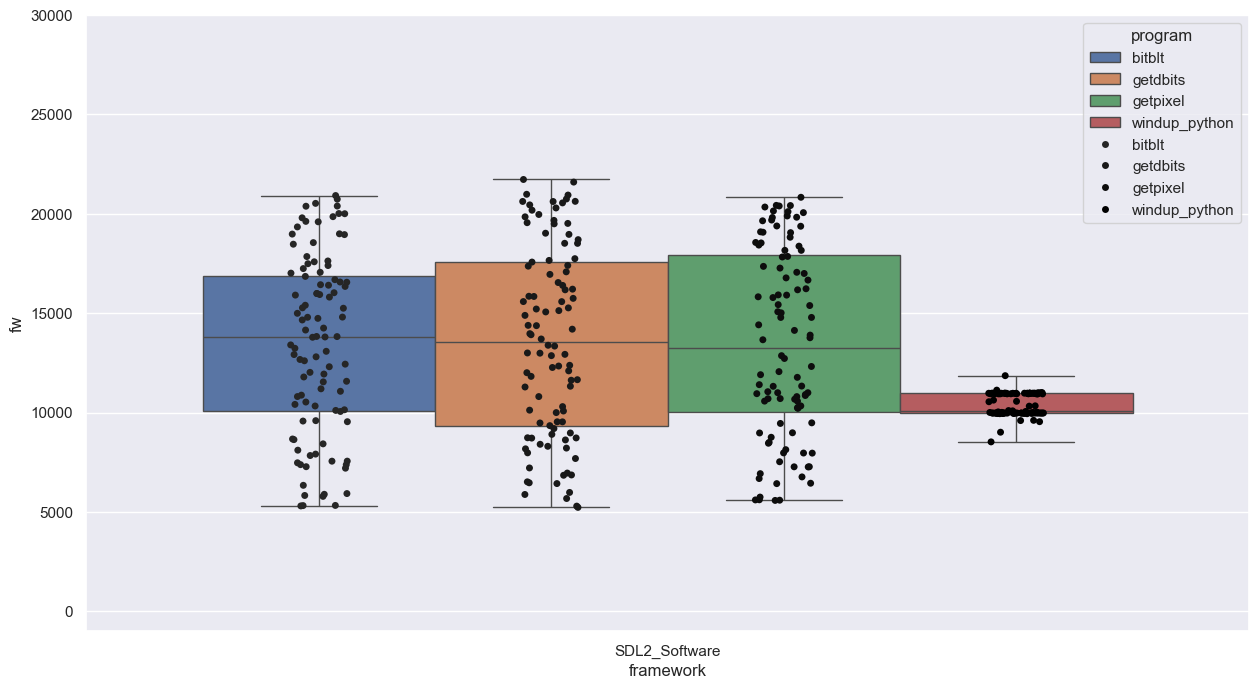

In [14]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 30000)

## Difference (ete and fw) by program

### Complexity: Default

C:\Users\tina\AppData\Local\Temp\ipykernel_19276\1954006209.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')


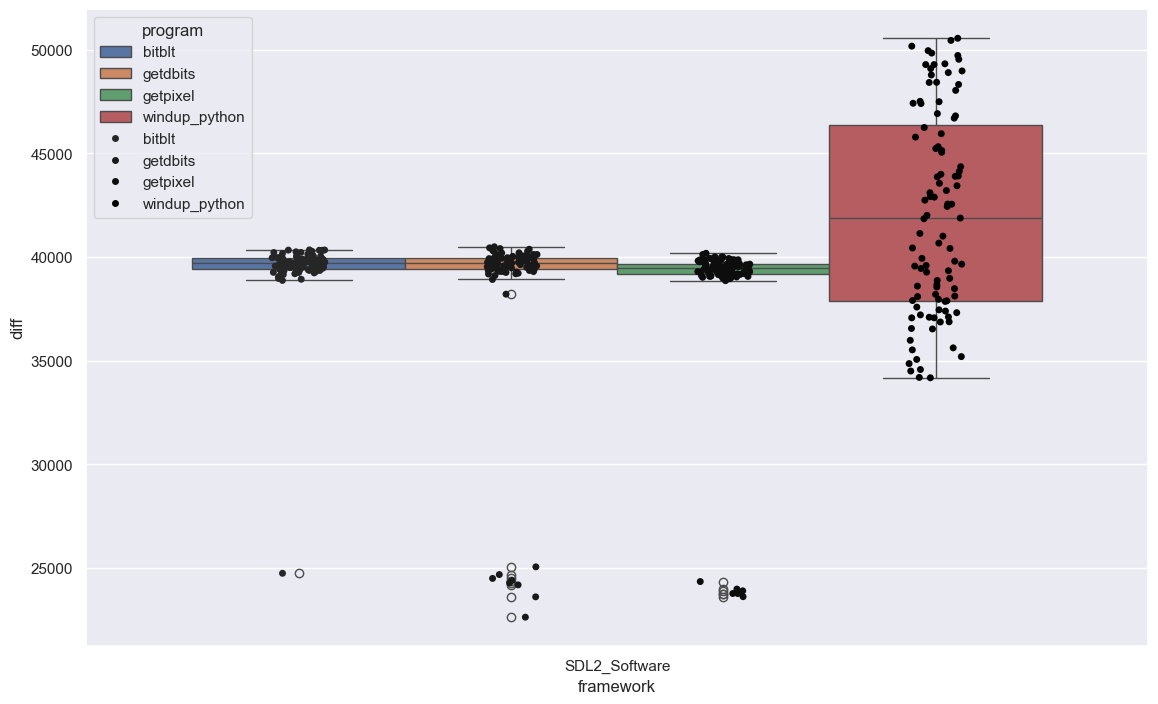

In [15]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
#ax.set_ylim(-80000, 80000)